In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
def sub_Dict():
    sub_Dict = dict({99: ['797','806','809','826','843','845','855','856','857'], 
                 114: ['1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934'],
        177:['2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377',
            '2378','2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
            '2401','2402','2404','2405','2407','2434','2444','2456',
             '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']}) 
    return sub_Dict

def GetCohort(subID):
    subDict = sub_Dict()
    for key, value in subDict.items():
        if subID in value:
            return key
        
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID

In [6]:

pc3_all = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/pc3_score_cencored.csv")
week_list = ['week1','week2','week3','week4','week5','week6','week7','week8']
for col in week_list:
    pc3_all.loc[pc3_all[col]>100, col] = 100


In [7]:
sleep_177 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_177.csv")
sleep_114 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_114.csv")
sleep_99 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_99.csv")
sleep_all = pd.concat([sleep_99,sleep_114, sleep_177])


In [8]:
R = ['843','856','857','1031','1381','1435','1465','1492',
     '1493','1519','1520','1721','2340','2378','2387','2401','2444','2447','3053']

sleep_all = sleep_all[~sleep_all['Unnamed: 0'].isin(R)]


pc3_reversed = pc3_all.iloc[:, ::-1]
sleep_reversed = sleep_all.iloc[:, ::-1]

In [9]:
df_list = []
nan_list = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
label = ['sleep_t-1','sleep_t-2','sleep_t-3','sleep_t-4','sleep_t-5','sleep_t-6','sleep_t-7']
vac = ['pc_t-1','pc_t-2','pc_t-3','pc_t-4','pc_t-5','pc_t-6','pc_t-7']

for n in range(96):
    df = pd.DataFrame({'subID':sleep_all.iloc[n][0],'const':np.ones(7),'sleep_t-1' : nan_list,'sleep_t-2' : nan_list,'sleep_t-3' : nan_list,'sleep_t-4' : nan_list,'sleep_t-5' : nan_list,
                 'sleep_t-6' : nan_list,'sleep_t-7' : nan_list,'pc_t-1' : nan_list,'pc_t-2' : nan_list,'pc_t-3' : nan_list,
                  'pc_t-4' : nan_list,'pc_t-5' : nan_list,'pc_t-6' : nan_list,'pc_t-7' : nan_list,'Y':nan_list},index=['t-1', 't-2', 't-3' , 't-4' , 't-5' ,'t-6','t-7' ])

    for i in range(7):
        df[label[i]].iloc[0:7-i] = sleep_reversed.iloc[n][1+i:8].tolist()
        df[vac[i]].iloc[0:7-i] = pc3_reversed.iloc[n][1+i:8].tolist()

        df['Y'].iloc[0:7] = pc3_reversed.iloc[n][0:7].tolist()
    df_list.append(df)
regression_df = pd.concat(df_list)


In [10]:
regression_df = regression_df[~regression_df.subID.isin([1174,1154,1467,1468,2378])]
t_1regression = regression_df[['subID','Y','sleep_t-4','pc_t-4','sleep_t-3','pc_t-3','sleep_t-2','pc_t-2','sleep_t-1','pc_t-1']]

t_1regression = pd.get_dummies(t_1regression, columns=['subID'])

In [12]:
Y = t_1regression['Y']
X = t_1regression[t_1regression.columns[7:]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.801
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           8.93e-49
Time:                        09:36:53   Log-Likelihood:                -2946.1
No. Observations:                 644   AIC:                             6080.
Df Residuals:                     550   BIC:                             6500.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           57.4735      6.226      9.232      0.000      45.244      69.702
sleep_t-1       -0.6049      0.667     -0.907      0.365      -1.915       0.705
pc_t-1          -0.0864      0.041     -2.100      0.036      -0.167      -0.006
subID_797.0     20.9122      9.583      2.182      0.030       2.089      39.736
subID_806.0     -2.1639      9.548     -0.227      0.821     -20.919      16.591
subID_809.0      5.0321      9.558      0.527      0.599     -13.742      23.806
subID_826.0     27.4047      9.576      2.862      0.004       8.595      46.214
subID_845.0     -2.9619      9.606     -0.308      0.758     -21.831      15.908
subID_855.0    -29.3960      9.616     -3.057      0.002     -48.285     -10.507
subID_1153.0   -18.9681      9.584     -1.979      0.048     -37.793      -0.143
subID_1157.0     6.0576      9.560      0.634      0.527     -12.720      24.836
subID_1262.0    38.6407      9.653      4.003      0.000      19.680      57.601
subID_1264.0   -45.9190      9.904     -4.636      0.000     -65.374     -26.464
subID_1266.0    12.0838      9.582      1.261      0.208      -6.738      30.905
subID_1364.0   -24.4118      9.561     -2.553      0.011     -43.192      -5.631
subID_1367.0     3.1761      9.594      0.331      0.741     -15.670      22.022
subID_1379.0   -19.8866     10.137     -1.962      0.050     -39.798       0.025
subID_1380.0   -30.3095      9.706     -3.123      0.002     -49.374     -11.245
subID_1384.0    12.2639      9.648      1.271      0.204      -6.687      31.215
subID_1489.0    45.5444      9.754      4.669      0.000      26.385      64.704
subID_1494.0    10.2788      9.585      1.072      0.284      -8.549      29.107
subID_1495.0   -33.9390      9.615     -3.530      0.000     -52.826     -15.052
subID_1498.0    21.6736      9.611      2.255      0.025       2.794      40.553
subID_1527.0    48.6215      9.720      5.002      0.000      29.528      67.715
subID_1532.0    10.7814      9.614      1.121      0.263      -8.104      29.667
subID_1536.0   -26.4843      9.624     -2.752      0.006     -45.389      -7.580
subID_1541.0   -10.0090      9.551     -1.048      0.295     -28.771       8.753
subID_1722.0   -18.0101      9.577     -1.881      0.061     -36.822       0.802
subID_1737.0   -20.2591      9.601     -2.110      0.035     -39.118      -1.401
subID_1741.0   -17.5120      9.597     -1.825      0.069     -36.364       1.339
subID_1788.0    42.8447      9.652      4.439      0.000      23.885      61.805
subID_1791.0   -17.3442      9.677     -1.792      0.074     -36.352       1.663
subID_1810.0    27.4069      9.613      2.851      0.005       8.524      46.289
subID_1812.0    -6.7429      9.633     -0.700      0.484     -25.666      12.180
subID_1833.0   -32.7141      9.638     -3.394      0.001     -51.646     -13.783
subID

In [26]:
YY = Y<100
X[YY]

model = sm.OLS(Y[YY],X[YY])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     6.522
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           2.37e-40
Time:                        09:51:55   Log-Likelihood:                -1976.7
No. Observations:                 490   AIC:                             4137.
Df Residuals:                     398   BIC:                             4523.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.5159      4.237      8.147      0.000      26.187      42.845
sleep_t-1        0.2221      0.438      0.507      0.612      -0.638       1.082
pc_t-1          -0.0405      0.030     -1.340      0.181      -0.100       0.019
subID_797.0     22.0938      6.779      3.259      0.001       8.766      35.421
subID_806.0      2.2273      6.171      0.361      0.718      -9.904      14.358
subID_809.0     11.3827      6.181      1.842      0.066      -0.768      23.533
subID_826.0     20.3955      7.558      2.698      0.007       5.536      35.255
subID_845.0      2.6944      6.191      0.435      0.664      -9.477      14.866
subID_855.0    -14.9984      5.779     -2.596      0.010     -26.359      -3.638
subID_1153.0    -4.0643      5.753     -0.706      0.480     -15.374       7.245
subID_1157.0    10.7130      6.177      1.734      0.084      -1.430      22.856
subID_1262.0    40.8681      7.629      5.357      0.000      25.871      55.866
subID_1264.0   -32.9449      5.985     -5.505      0.000     -44.710     -21.180
subID_1266.0    -3.0381      7.602     -0.400      0.690     -17.984      11.908
subID_1364.0   -10.5369      5.730     -1.839      0.067     -21.802       0.729
subID_1367.0    -1.2669      6.791     -0.187      0.852     -14.617      12.083
subID_1379.0    -9.9244      6.125     -1.620      0.106     -21.966       2.117
subID_1380.0   -17.8594      5.828     -3.064      0.002     -29.318      -6.401
subID_1384.0    17.1270      6.254      2.738      0.006       4.831      29.423
subID_1489.0    47.3866      7.786      6.086      0.000      32.079      62.694
subID_1494.0    23.3567      5.752      4.061      0.000      12.048      34.665
subID_1495.0   -20.6113      5.768     -3.573      0.000     -31.951      -9.271
subID_1498.0    -4.9391      8.712     -0.567      0.571     -22.066      12.187
subID_1527.0    15.2180     15.134      1.006      0.315     -14.534      44.970
subID_1532.0     5.0869      6.817      0.746      0.456      -8.315      18.488
subID_1536.0   -12.4322      5.782     -2.150      0.032     -23.798      -1.066
subID_1541.0   -21.9726      6.770     -3.245      0.001     -35.283      -8.662
subID_1722.0    -3.4200      5.747     -0.595      0.552     -14.718       7.878
subID_1737.0    -6.5389      5.760     -1.135      0.257     -17.863       4.785
subID_1741.0    -3.7902      5.757     -0.658      0.511     -15.109       7.529
subID_1788.0    47.0616      7.617      6.179      0.000      32.087      62.036
subID_1791.0    -4.6204      5.809     -0.795      0.427     -16.041       6.800
subID_1810.0     5.8998      8.837      0.668      0.505     -11.473      23.273
subID_1812.0   -17.5042      6.850     -2.555      0.011     -30.971      -4.037
subID_1833.0   -18.2154      5.797     -3.142      0.002     -29.612      -6.819
subID

In [13]:
beta1 = np.array(results.params)
X_matx = np.array(X)
y_hat = beta1.T@X_matx.T
residue = Y-y_hat
t_1regression.insert (0, "residue", residue)

t_2regression = t_1regression[['residue','sleep_t-2','pc_t-2']]
t_2regression_df = t_2regression.dropna()

In [14]:
Y1 = t_2regression_df['residue']
X1 = t_2regression_df[['sleep_t-2','pc_t-2']]

model = sm.OLS(Y1,X1)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                residue   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.178
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                       0.309
Time:                        09:39:31   Log-Likelihood:                         -2509.7
No. Observations:                 552   AIC:                                      5023.
Df Residuals:                     550   BIC:                                      5032.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-2      0.2462      0.174      1.417      0.157      -0.095       0.587
pc_t-2        -0.0400      0.027     -1.482      0.139      -0.093       0.013
==============================================================================
Omnibus:                       26.865   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.942
Skew:                           0.518   Prob(JB):                     3.15e-07
Kurtosis:                       3.479   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
beta2 = np.array(results.params)
X_matx1 = np.array(X1)
y_hat1 = beta2.T@X_matx1.T
residue2 = Y1-y_hat1

regression3_df = t_1regression.drop('t-7')
regression3_df.insert (0, "residue2", residue2)
t_3regression = regression3_df[['residue2','sleep_t-3','pc_t-3']]
t_3regression_df = t_3regression.dropna()

Y2 = t_3regression_df['residue2']
X2 = t_3regression_df[['sleep_t-3','pc_t-3']]

model = sm.OLS(Y2,X2)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue2   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                            0.03632
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                       0.964
Time:                        09:39:35   Log-Likelihood:                         -2093.9
No. Observations:                 460   AIC:                                      4192.
Df Residuals:                     458   BIC:                                      4200.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-3     -0.0306      0.190     -0.161      0.872      -0.403       0.342
pc_t-3         0.0077      0.030      0.260      0.795      -0.050       0.066
==============================================================================
Omnibus:                       24.762   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.880
Skew:                           0.538   Prob(JB):                     8.83e-07
Kurtosis:                       3.544   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
beta3 = np.array(results.params)
X_matx2 = np.array(X2)
y_hat2 = beta3.T@X_matx2.T
residue3 = Y2-y_hat2

regression4_df = t_1regression.drop('t-7')
regression4_df = regression4_df.drop('t-6')
regression4_df.insert (0, "residue3", residue3)

t_4regression = regression4_df[['residue3','sleep_t-4','pc_t-4']]
t_4regression_df = t_4regression.dropna()

Y3 = t_4regression_df['residue3']
X3 = t_4regression_df[['sleep_t-4','pc_t-4']]

model = sm.OLS(Y3,X3)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue3   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              2.439
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                      0.0886
Time:                        09:40:04   Log-Likelihood:                         -1681.5
No. Observations:                 368   AIC:                                      3367.
Df Residuals:                     366   BIC:                                      3375.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-4      0.4549      0.212      2.147      0.032       0.038       0.871
pc_t-4        -0.0672      0.034     -1.995      0.047      -0.133      -0.001
==============================================================================
Omnibus:                       18.362   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.695
Skew:                           0.551   Prob(JB):                     5.29e-05
Kurtosis:                       3.264   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

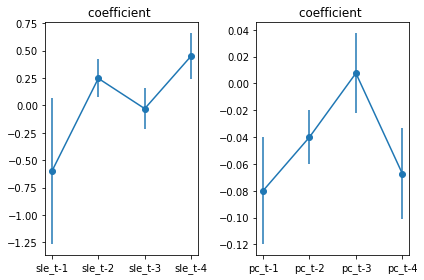

In [7]:

x = [1,2,3,4]
y = [-0.6,0.246,-0.03,0.45]

# example error bar values that vary with x-position
error = [0.667,0.174,0.19,0.21]

x1 = [1,2,3,4]
y1 = [-0.08,-0.0400,0.0077,-0.0672]
error1 = [0.040,0.02,0.03,0.034]

plt.subplot(121)
plt.errorbar(x, y, yerr=error, fmt='-o')
plt.title('coefficient ')
plt.xticks([1, 2, 3,4], ['sle_t-1', 'sle_t-2', 'sle_t-3','sle_t-4'])
plt.subplot(122)
plt.errorbar(x1,y1,yerr= error1,fmt='-o')
plt.title('coefficient ')
plt.xticks([1, 2, 3,4], ['pc_t-1', 'pc_t-2', 'pc_t-3','pc_t-4'])
plt.tight_layout()